Importing Required Packages & Reading Data

In [1]:
# Import all required packages

import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')
from numpy  import nan

Loading Data

In [2]:
train_data = pd.read_excel("Final_Train.xlsx")
test_data = pd.read_excel("Final_Test.xlsx")
test_sub = pd.read_excel("Sample_submission.xlsx")

Checking our train and test data

In [3]:
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
test_sub.head()

,Fees
0,1747
1,1725
2,2194
3,2193
4,2091


In [6]:
train_data.shape

(5961, 7)

In [7]:
test_data.shape

(1987, 6)

In [8]:
test_sub.shape

(1987, 1)

 Exploratory Data Analysis

In [9]:
print(train_data.info())
print(test_data.info())
print(test_sub.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profil

In [10]:
# Creating a combined data frame
test_data['Fees'] = nan
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",NaN
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,NaN


In [11]:
#Combine test and train into one file
train_data['source']='train'
test_data['source']='test'
df = pd.concat([train_data, test_data],ignore_index=True)
print(train_data.shape, test_data.shape, df.shape)

(5961, 8) (1987, 8) (7948, 8)


In [12]:
print(df.shape)

(7948, 8)


In [13]:
print(df.columns)

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees', 'source'],
      dtype='object')


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
 7   source              7948 non-null   object 
dtypes: float64(1), object(7)
memory usage: 496.9+ KB
None


In [15]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Working with Missing Values

In [16]:
df.loc[:,df.columns != 'Fees'].isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
source                   0
dtype: int64

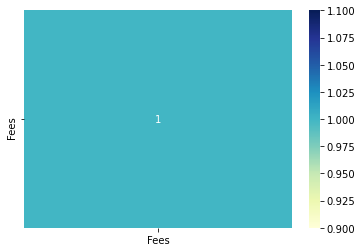

In [17]:
sb.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

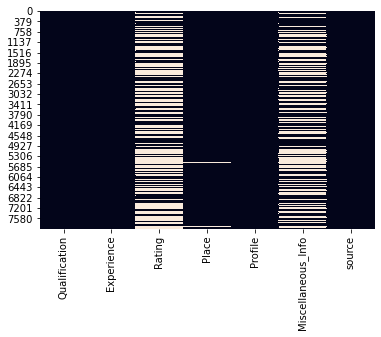

In [18]:
sb.heatmap(df.loc[:,df.columns != 'Fees'].isnull(), cbar=False)

Visulization

In [19]:
df['Qualification'].value_counts()

BDS                                                                                                632
BHMS                                                                                               627
BAMS                                                                                               624
MBBS                                                                                               441
MBBS, MS - ENT                                                                                     280
                                                                                                  ... 
BDS, MDS - Orthodontics, D.Sc                                                                        1
POST GRADUATE IN HOMOEOPATHY, BHMS                                                                   1
BHMS, MBA (Health Care), Post Graduate Diploma in Healthcare Management(PGDHM), MS - Psychology      1
MBBS, MRCGP, Diploma in Diabetes                                         

In [20]:
df['Profile'].value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

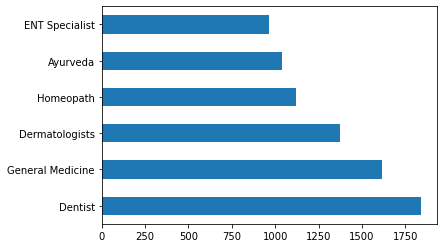

In [21]:
df['Profile'].value_counts().plot(kind='barh')

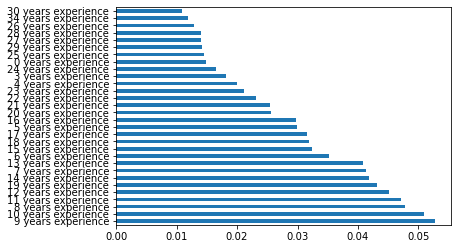

In [22]:
df['Experience'].value_counts(normalize=True)[:30].plot(kind='barh')

In [23]:
df['Experience'] = df['Experience'].str.replace(' years experience','').astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   int64  
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
 7   source              7948 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 496.9+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DFA9EB1C0>]],
      dtype=object)

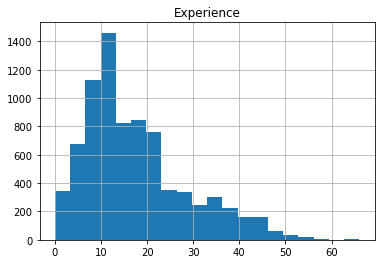

In [24]:
df.hist(column='Experience', bins=20)

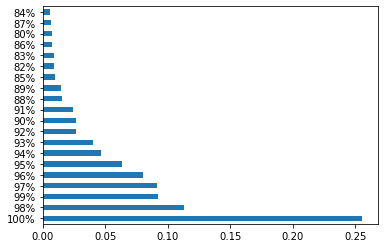

In [25]:
df['Rating'].value_counts(normalize=True)[:20].plot(kind='barh')

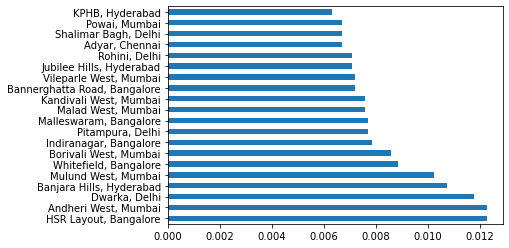

In [26]:
df['Place'].value_counts(normalize=True)[:20].plot(kind='barh')

In [27]:
df['Rating'] = df['Rating'].str[0:-1].astype(float)

In [28]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,train
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,train


In [29]:
#We will drop Miscellanous_info
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [30]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,350.0,train
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,250.0,train


In [31]:
# We will focus on qualification column
def chgequali(x):
    bans=x.split(' ')
    sans=x.split(',')
    if ',' not in x:
        return bans[0]
    else:
        return sans[0]

In [32]:
df['Qualification']=df['Qualification'].apply(chgequali)

In [33]:
df['Qualification'].head()

0             BHMS
1             BAMS
2             MBBS
3    BSc - Zoology
4             BAMS
Name: Qualification, dtype: object

In [34]:
# Now we will remove minus
def reminus(x):
    cabs=x.split('-')
    if '-' in x:
        return cabs[0]
    else:
        return x

In [35]:
df['Qualification'] = df['Qualification'].apply(reminus)

In [36]:
df['Qualification'].value_counts()

MBBS                                         3313
BDS                                          1579
BAMS                                          939
BHMS                                          938
MD                                            338
                                             ... 
Member of the Royal College of Physicians       1
FWFO                                            1
Post MD SR AIIMS                                1
DO                                              1
FRCS                                            1
Name: Qualification, Length: 120, dtype: int64

In [37]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,BHMS,24,100.0,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,BAMS,12,98.0,"Whitefield, Bangalore",Ayurveda,350.0,train
2,MBBS,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,BSc,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,250.0,train


In [38]:
df.isnull().sum()

Qualification       0
Experience          0
Rating           4392
Place              31
Profile             0
Fees             1987
source              0
dtype: int64

In [39]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [40]:
def stillqua(x):
    dab=x.strip('.')
    tab= dab.lower()
    mylist=['bsc','diploma','certifi','doctor']
    if mylist[0] in tab:
        return 'BSC'
    elif mylist[1] in tab:
        return 'Diploma'
    elif mylist[2] in tab:
        return 'Certification'
    elif mylist[3] in tab:
        return 'PhD'
    else:
        return x

In [41]:
df['Qualification'].apply(stillqua)

0       BHMS
1       BAMS
2       MBBS
3        BSC
4       BAMS
        ... 
7943    BAMS
7944     MD 
7945    MBBS
7946     BDS
7947    MBBS
Name: Qualification, Length: 7948, dtype: object

In [42]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,BHMS,24,100.0,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,BAMS,12,98.0,"Whitefield, Bangalore",Ayurveda,350.0,train
2,MBBS,9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,BSc,12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,250.0,train


In [43]:
df['Qualification'].value_counts()

MBBS                                         3313
BDS                                          1579
BAMS                                          939
BHMS                                          938
MD                                            338
                                             ... 
Member of the Royal College of Physicians       1
FWFO                                            1
Post MD SR AIIMS                                1
DO                                              1
FRCS                                            1
Name: Qualification, Length: 120, dtype: int64

In [44]:
df.isnull().sum()

Qualification       0
Experience          0
Rating           4392
Place              31
Profile             0
Fees             1987
source              0
dtype: int64

In [45]:
df.dtypes

Qualification     object
Experience         int64
Rating           float64
Place             object
Profile           object
Fees             float64
source            object
dtype: object

# Filling NaN values

In [46]:
rat=df[df['Rating'].notnull()]

In [47]:
df['Profile'].value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [48]:
rat.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.277108
Dentist             97.698454
Dermatologists      93.446281
ENT Specialist      88.973236
General Medicine    91.944238
Homeopath           96.524496
Name: Rating, dtype: float64

In [49]:
def fillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96'

        elif Profile == 'Dentist':
            return '98'
        elif Profile=='Dermatologists':
            return '93'
        elif Profile=='ENT Specialist':
            return '88'
        elif Profile=='General Medicine':
            return '93'
        elif Profile=='Homeopath':
            return '96'
    else:
        return Rating

In [50]:
df['Rating']=df[['Rating','Profile']].apply(fillratings,axis=1)

In [51]:
df['Rating'].isnull().sum()

0

In [52]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,BHMS,24,100,"Kakkanad, Ernakulam",Homeopath,100.0,train
1,BAMS,12,98,"Whitefield, Bangalore",Ayurveda,350.0,train
2,MBBS,9,88,"Mathikere - BEL, Bangalore",ENT Specialist,300.0,train
3,BSc,12,96,"Bannerghatta Road, Bangalore",Ayurveda,250.0,train
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,250.0,train


In [53]:
df['Rating']=df['Rating'].astype(int)

In [54]:
dplace=df[df['Place'].notnull()]

In [55]:
def Placexact(x):
    exa=str(x).split(' ')
    return exa[-1]

In [56]:
dplace['Place']=dplace['Place'].apply(Placexact)

In [57]:
dplace['Place'].value_counts()

Bangalore             1678
Mumbai                1608
Delhi                 1602
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
e                        1
Name: Place, dtype: int64

In [58]:
dplace[dplace['Place']=='e']

,Qualification,Experience,Rating,Place,Profile,Fees,source
3980,BDS,23,98,e,Dentist,250.0,train


In [59]:
df['Place'].fillna('Malleswaram, Bangalore',inplace=True)

In [60]:
df['Place']=df['Place'].apply(Placexact)

In [61]:
df['Place'].value_counts()

Bangalore             1709
Mumbai                1608
Delhi                 1602
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
e                        1
Name: Place, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  7948 non-null   object 
 1   Experience     7948 non-null   int64  
 2   Rating         7948 non-null   int32  
 3   Place          7948 non-null   object 
 4   Profile        7948 non-null   object 
 5   Fees           5961 non-null   float64
 6   source         7948 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 403.7+ KB


Prepoccesing
converting categorical variables to meaningful numbers

In [63]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,BHMS,24,100,Ernakulam,Homeopath,100.0,train
1,BAMS,12,98,Bangalore,Ayurveda,350.0,train
2,MBBS,9,88,Bangalore,ENT Specialist,300.0,train
3,BSc,12,96,Bangalore,Ayurveda,250.0,train
4,BAMS,20,100,Chennai,Ayurveda,250.0,train


In [64]:
df['Fees'].min()

5.0

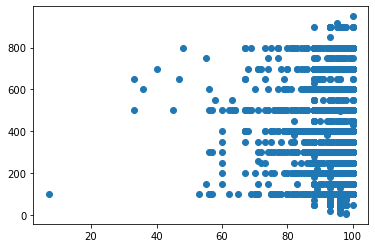

In [65]:
plt.scatter(df['Rating'],df['Fees'])

In [66]:
#50 because of max rating is 100
def crat(x):
    if x<=50: 
        return 1 
    if x>50:
        return 2

In [67]:
df['Rating']=df['Rating'].apply(crat)

In [68]:
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder

In [69]:
le = LabelEncoder()

In [70]:
df['Place']= le.fit_transform(df['Place'])

In [71]:
df['Place'].unique()

array([4, 0, 1, 3, 5, 2, 6, 7, 8])

In [72]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,BHMS,24,2,4,Homeopath,100.0,train
1,BAMS,12,2,0,Ayurveda,350.0,train
2,MBBS,9,2,0,ENT Specialist,300.0,train
3,BSc,12,2,0,Ayurveda,250.0,train
4,BAMS,20,2,1,Ayurveda,250.0,train


In [73]:
df['Profile']= le.fit_transform(df['Profile'])

In [74]:
df['Profile'].unique()

array([5, 0, 3, 1, 4, 2])

In [75]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,BHMS,24,2,4,5,100.0,train
1,BAMS,12,2,0,0,350.0,train
2,MBBS,9,2,0,3,300.0,train
3,BSc,12,2,0,0,250.0,train
4,BAMS,20,2,1,0,250.0,train


In [76]:
oe = OrdinalEncoder()

In [77]:
df['Qualification']= le.fit_transform(df['Qualification'])

In [78]:
df['Qualification'].unique()

array([  8,   5,  87,  13,   6,  12,  91,  42,  30,  89,  92,  76, 109,
        97, 100,  25,  28,  29,  88,  75,  99, 116,  33,  19,  68,  55,
        70,  11,  45,  60, 112,  17,  21,   0,  78,  53,  41,  49,  52,
       101,  38,  69, 110,   1,  47,  57,  74,  32,  14,  43,  86, 119,
       106, 108,  73,   4, 114,  80,  24,  72,   7,  98, 117,  85, 118,
        93,  77,  96,  64,   3,  81,   9,  51,  37,  16,   2,  23, 104,
        50, 113,  71,  94,  48,  95,  15, 107,  84,  34,  54,  65,  79,
        62,  67,  22,  20,  90, 102,  18, 103, 105,  58,  27, 115,  83,
        35,  63,  66,  46,  31, 111,  39,  10,  56,  82,  44,  59,  26,
        61,  40,  36])

In [79]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,source
0,8,24,2,4,5,100.0,train
1,5,12,2,0,0,350.0,train
2,87,9,2,0,3,300.0,train
3,13,12,2,0,0,250.0,train
4,5,20,2,1,0,250.0,train


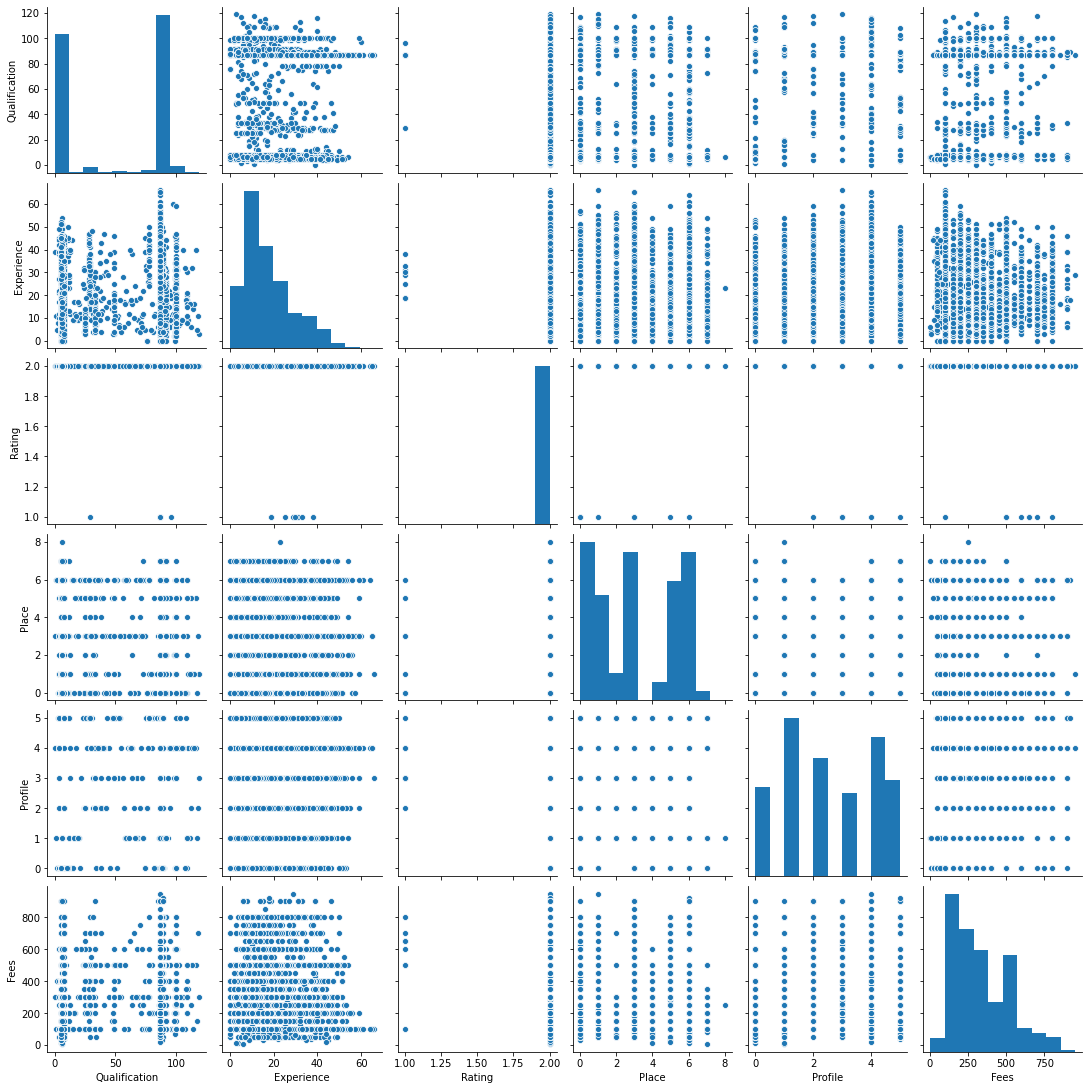

In [80]:
sb.pairplot(df)

In [81]:
df.skew()

Qualification    -0.145932
Experience        0.984224
Rating          -31.478167
Place             0.003023
Profile           0.088789
Fees              0.751870
dtype: float64

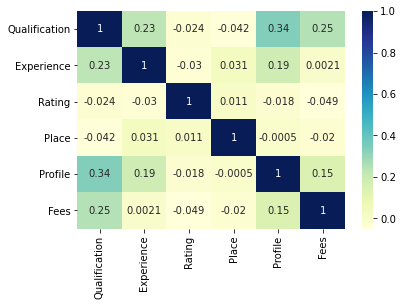

In [82]:
sb.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [83]:
df.drop(['Rating'],axis=1,inplace=True)

In [84]:
#Divide into test and train:
df1 = df.loc[df['source']=="train"]

In [85]:
df2 = df.loc[df['source']=="test"]

In [86]:
df1.head()

,Qualification,Experience,Place,Profile,Fees,source
0,8,24,4,5,100.0,train
1,5,12,0,0,350.0,train
2,87,9,0,3,300.0,train
3,13,12,0,0,250.0,train
4,5,20,1,0,250.0,train


In [87]:
df1.shape

(5961, 6)

In [88]:
df2.shape

(1987, 6)

In [89]:
df1.drop(['source'],axis=1,inplace=True)
df1.head()

,Qualification,Experience,Place,Profile,Fees
0,8,24,4,5,100.0
1,5,12,0,0,350.0
2,87,9,0,3,300.0
3,13,12,0,0,250.0
4,5,20,1,0,250.0


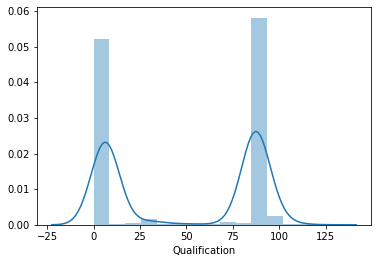

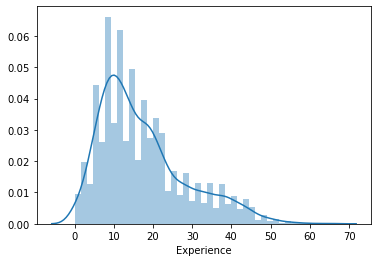

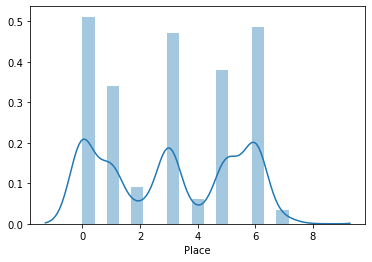

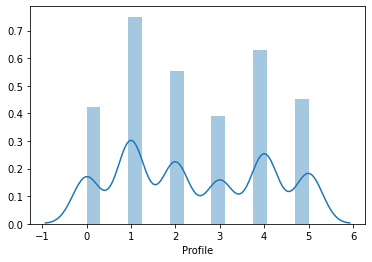

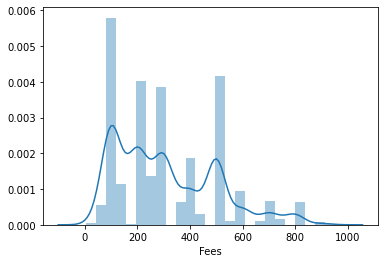

In [98]:
for i in df1.columns:
    plt.figure()
    sb.distplot(df1[i])

In [90]:
df2.head()

,Qualification,Experience,Place,Profile,Fees,source
5961,87,35,6,4,NaN,test
5962,87,31,5,3,NaN,test
5963,87,40,1,2,NaN,test
5964,5,0,3,0,NaN,test
5965,6,16,0,1,NaN,test


In [91]:
df2.drop(['source'],axis=1,inplace=True)

In [92]:
df2.drop(['Fees'],axis=1,inplace=True)
df2.head()

,Qualification,Experience,Place,Profile
5961,87,35,6,4
5962,87,31,5,3
5963,87,40,1,2
5964,5,0,3,0
5965,6,16,0,1


In [93]:
X_train = df1.drop(['Fees'], axis=1)

In [94]:
Y_train = df1['Fees']

In [96]:
X_train.skew()

Qualification   -0.129702
Experience       0.991089
Place            0.003425
Profile          0.108803
dtype: float64

In [100]:
for i in X_train.columns:
    if X_train[i].skew()>0.5:
        X_train[i]=np.cbrt(X_train[i])
    if X_train[i].skew()<-0.5:
        X_train[i]=np.cbrt(X_train[i])
        
X_train.skew()

Qualification   -0.129702
Experience      -4.989093
Place            0.003425
Profile          0.108803
dtype: float64

In [101]:
X_test = df2.copy()

In [102]:
X_test.shape

(1987, 4)

In [103]:
X_test.head()

,Qualification,Experience,Place,Profile
5961,87,35,6,4
5962,87,31,5,3
5963,87,40,1,2
5964,5,0,3,0
5965,6,16,0,1


In [104]:
X_train.shape

(5961, 4)

In [105]:
Y_train.shape

(5961,)

In [106]:
Y_train.head()

0    100.0
1    350.0
2    300.0
3    250.0
4    250.0
Name: Fees, dtype: float64

In [107]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [108]:
lr = LinearRegression()

In [109]:
lr.fit(X_train, Y_train)

LinearRegression()

In [110]:
# Predicting the test set results
y_pred = lr.predict(X_test)

In [111]:
y_pred

array([1902.5128627 , 1712.2158532 , 2122.65905644, ...,  713.11766298,
        744.72758286,  652.02707594])

In [112]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [113]:
lr_accuracy = round(lr.score(X_train,Y_train)*100,2)
lr_accuracy

6.8

In [114]:
r2_score(Y_train, lr.predict(X_train))

0.06799990065379313

In [115]:
cv_score = cross_val_score(lr, X_train, Y_train, cv=5)

In [116]:
print(np.sqrt(np.abs(cv_score)))

[0.25714262 0.24415901 0.25698856 0.2559548  0.2681145 ]


Decision Tree

In [117]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
dt.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [118]:
# Predicting the test set results
y_preddt = dt.predict(X_test)
y_preddt

array([237.23404255, 371.92878338, 354.88673139, ..., 237.23404255,
       298.29971182, 354.88673139])

In [119]:
tree_accuracy = round(dt.score(X_train,Y_train),2)
tree_accuracy

0.14

In [120]:
r2_score(Y_train, dt.predict(X_train))

0.13604560078552141

In [121]:
cv_score = cross_val_score(dt, X_train, Y_train, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.34224046 0.3323248  0.36734536 0.33457343 0.34747123]


In [122]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [123]:
y_predrf = rf.predict(X_test)
y_predrf

array([203.27376768, 281.60541568, 278.91014133, ..., 224.55494714,
       274.00167984, 278.91014133])

In [124]:
rf_accuracy = round(rf.score(X_train,Y_train),2)
rf_accuracy

0.18

In [125]:
r2_score(Y_train, rf.predict(X_train))

0.1817790949316136

In [126]:
cv_score = cross_val_score(rf, X_train, Y_train, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.37639795 0.38372398 0.41434827 0.40712358 0.39166781]


In [128]:
import pickle
filename = 'Fee.pkl'
pickle.dump(rf,open(filename,'wb'))